In [1]:
import sys 
sys.path.append('../src/')
import ANNNIstates as ANNNI

In [2]:
TT = ANNNI.mps(gpu=True)

In [3]:
TT.train(epochs=1000)

Labels: [0 1 2]
Number of training points: 41


  0%|          | 0/1000 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.04620: 100%|██████████| 1000/1000 [00:44<00:00, 22.28it/s]


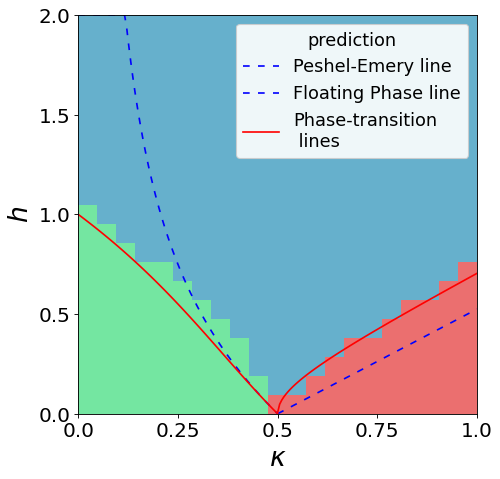

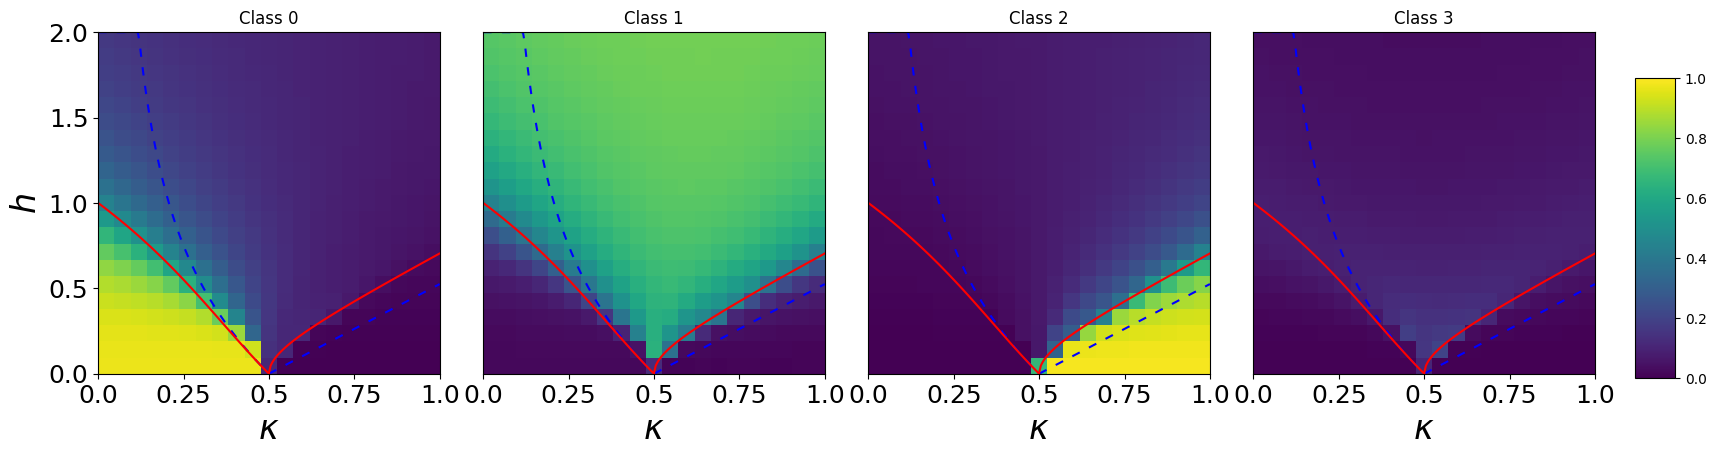

In [4]:
TT.predict(plot=True, eachclass=True)

## Training only using one of the three Phases:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

20
Labels: [0]
Number of training points: 20


Loss: 0.02639: 100%|██████████| 250/250 [00:14<00:00, 17.18it/s]


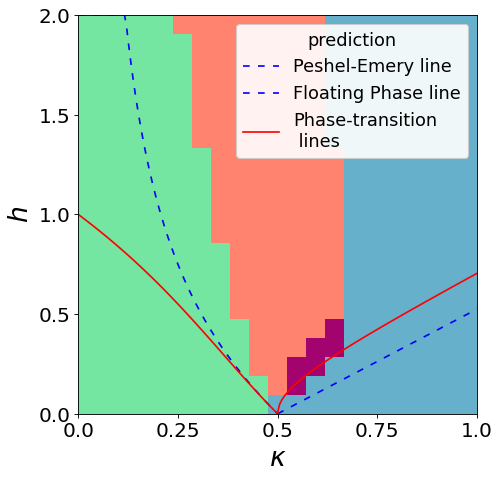

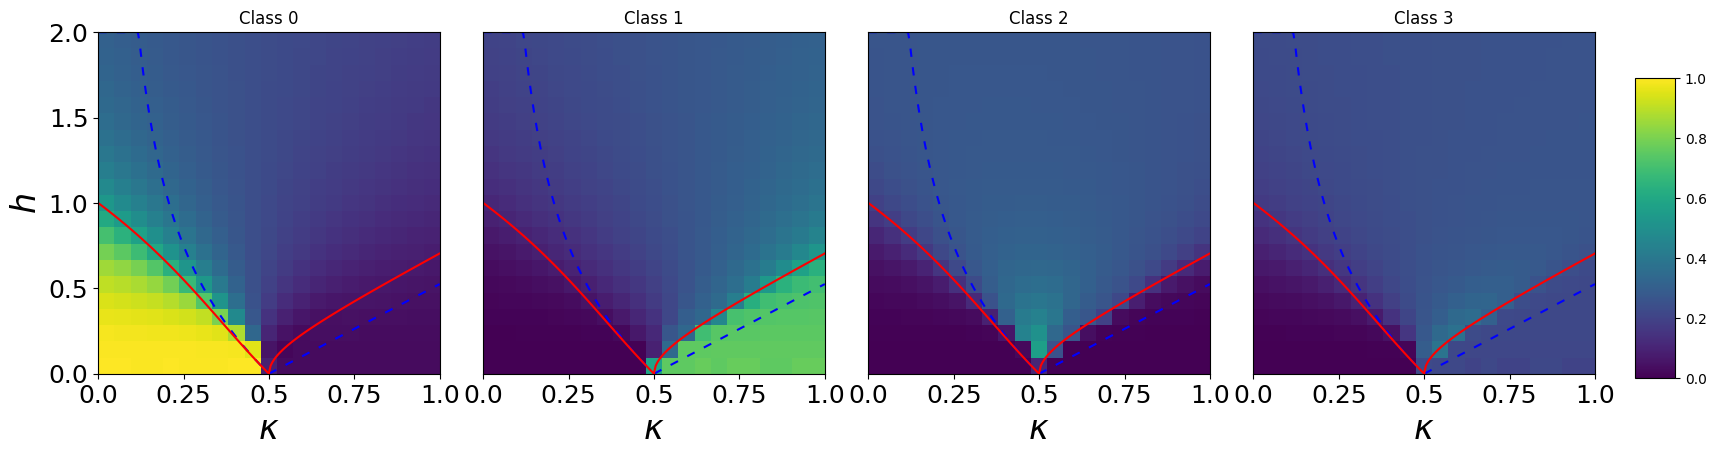

10
Labels: [1]
Number of training points: 10


Loss: 0.00988: 100%|██████████| 250/250 [00:11<00:00, 22.05it/s] 


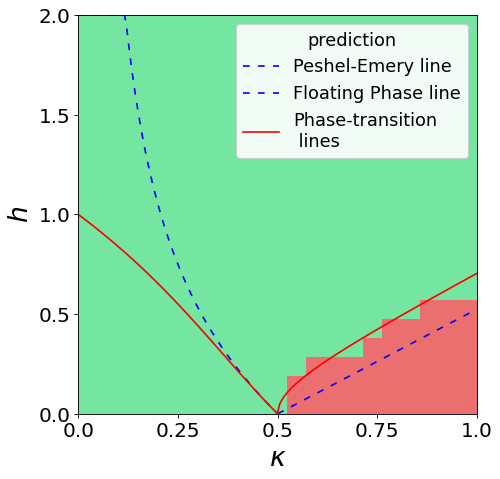

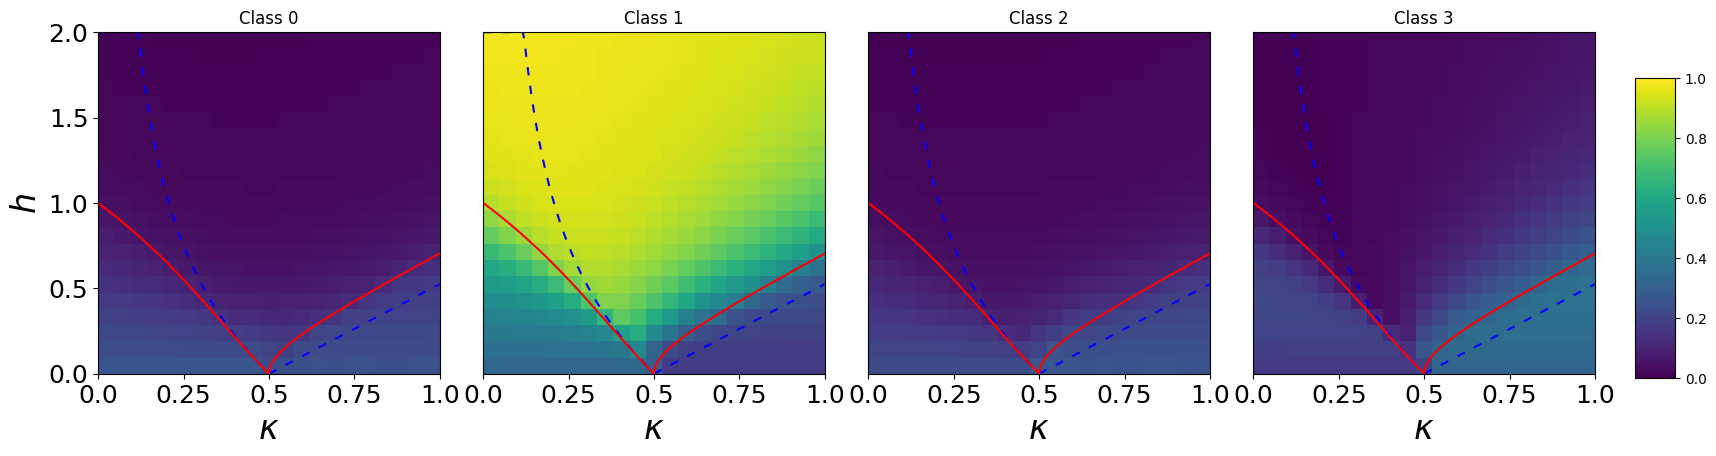

11
Labels: [2]
Number of training points: 11


Loss: 0.01251: 100%|██████████| 250/250 [00:11<00:00, 21.83it/s] 


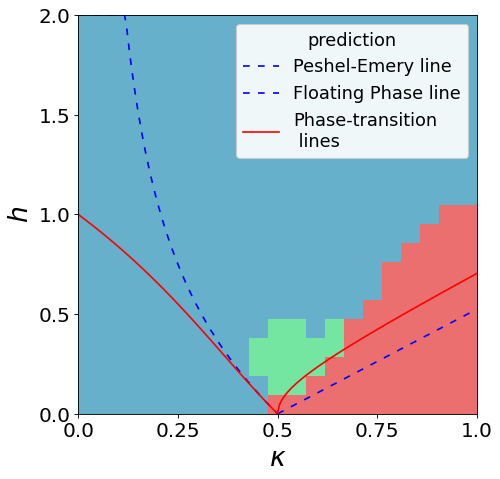

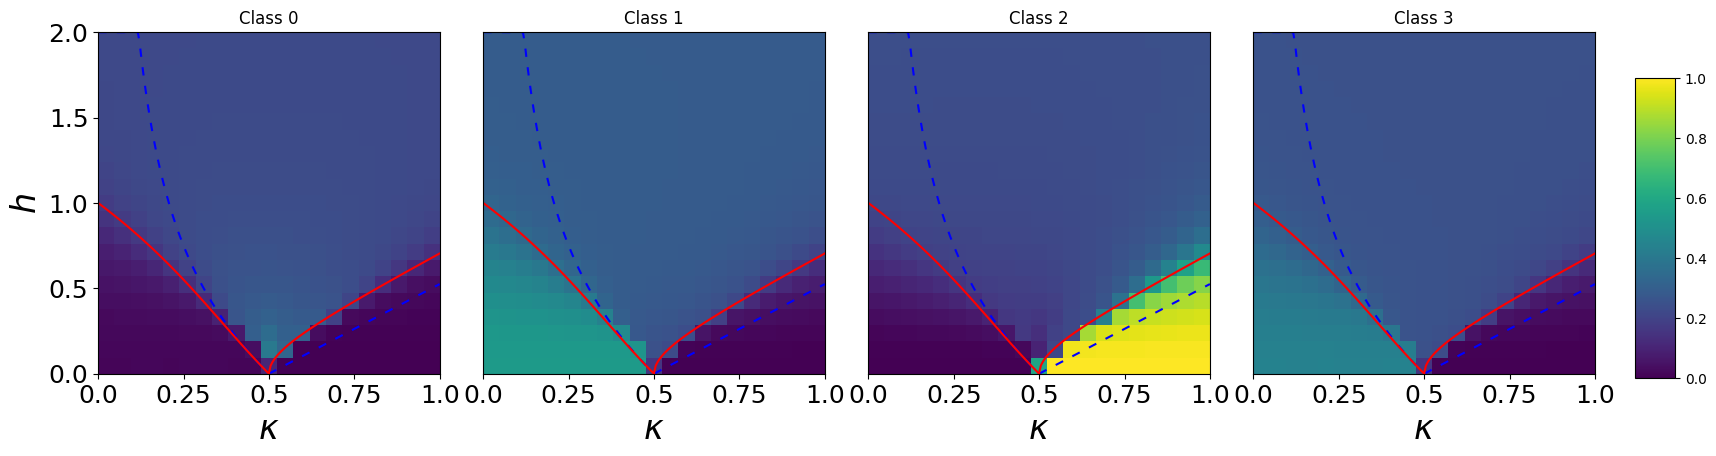

In [6]:
masks = [TT.mask_analitical_ferro, TT.mask_analitical_para, TT.mask_analitical_anti]

for mask in masks:
    print(sum(mask))
    TT.qcnn.reset_params()
    TT.train(epochs=250, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()

## Training only using two of the three Phases:

Labels: [0 1]
Number of training points: 30


Loss: 0.05611: 100%|██████████| 250/250 [00:18<00:00, 13.34it/s]


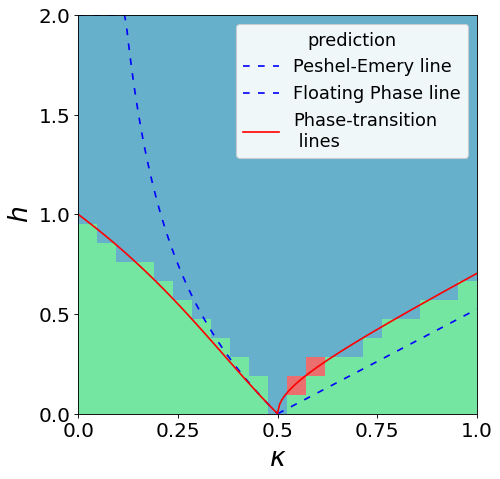

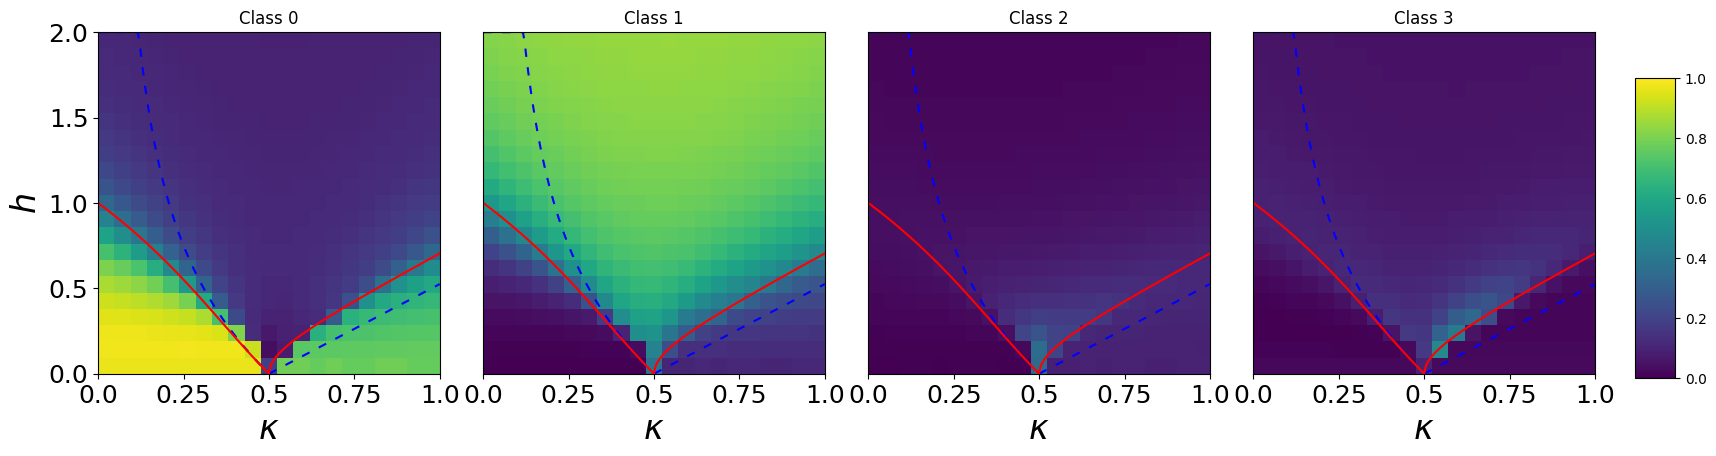

Labels: [0 2]
Number of training points: 31


Loss: 0.01869: 100%|██████████| 250/250 [00:19<00:00, 12.89it/s]


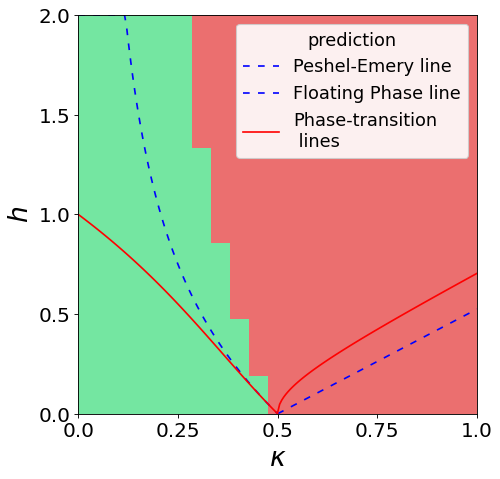

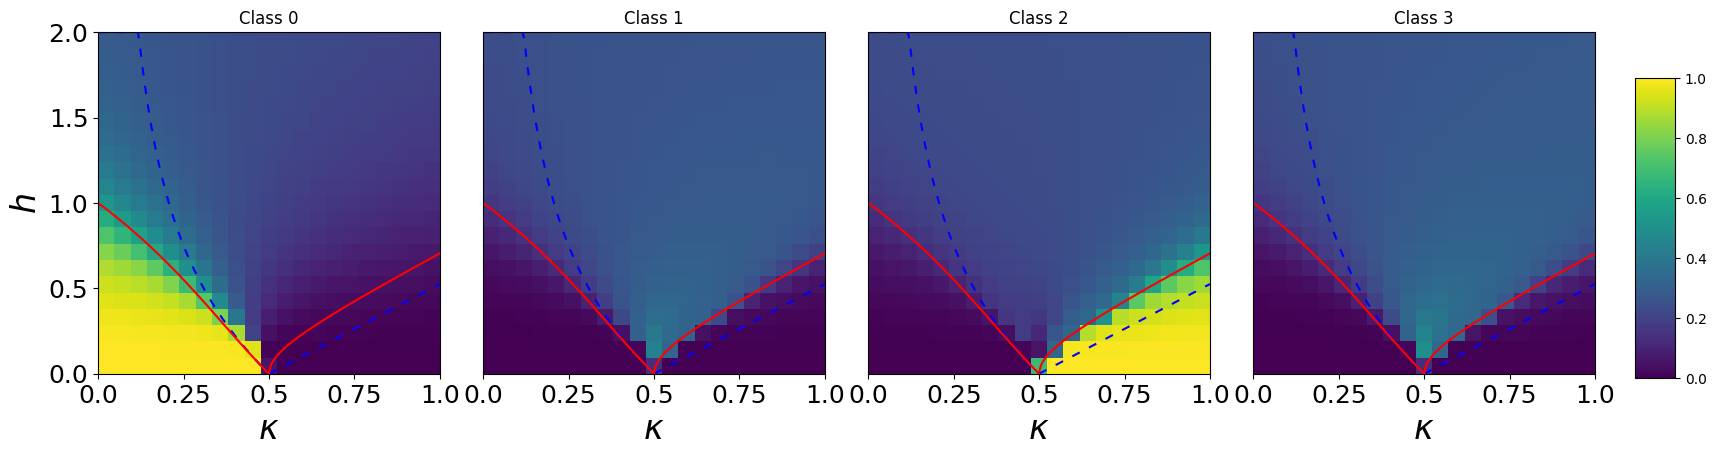

Labels: [1 2]
Number of training points: 21


Loss: 0.02760: 100%|██████████| 250/250 [00:15<00:00, 16.10it/s]


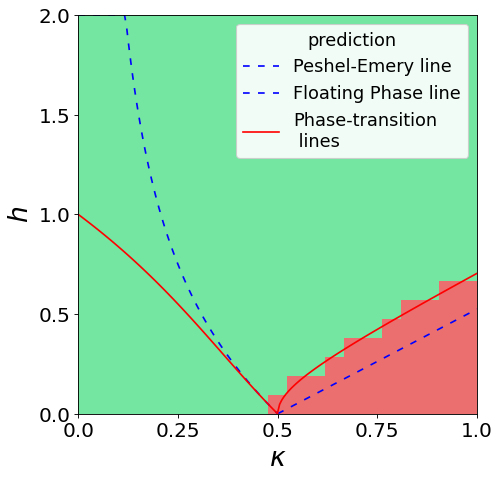

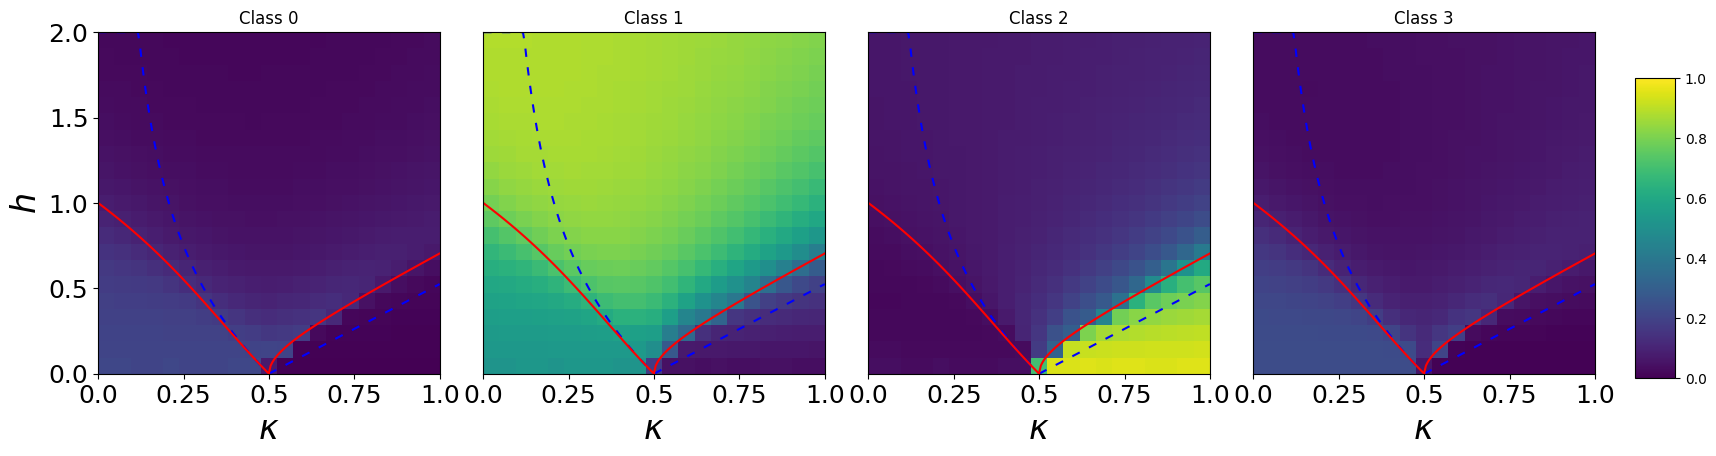

In [7]:
masks2 = [np.logical_or(masks[0], masks[1]), np.logical_or(masks[0], masks[2]), np.logical_or(masks[1], masks[2])]

for mask in masks2:
    TT.qcnn.reset_params()
    TT.train(epochs=250, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()

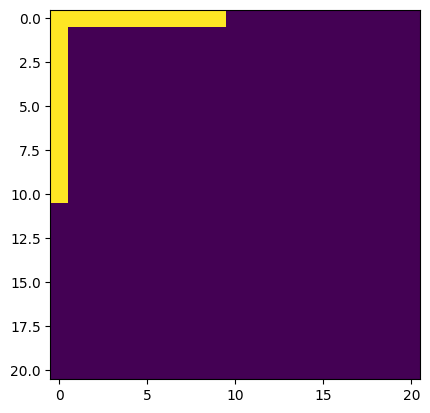

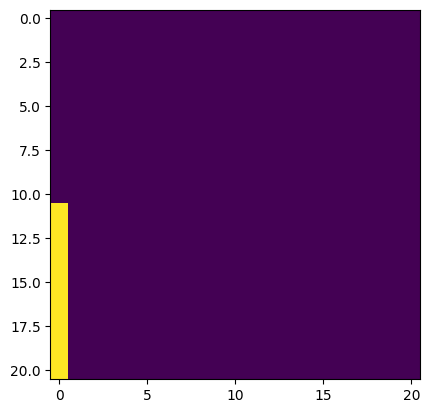

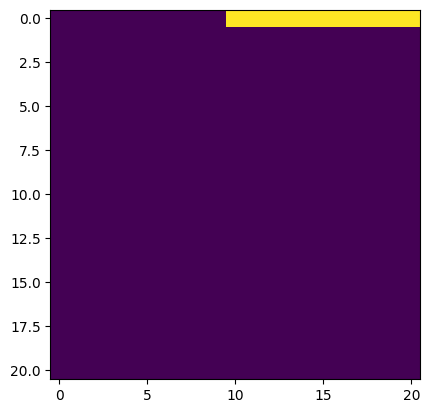

In [8]:
for mask in masks:
    plt.imshow(np.reshape(mask, (21,21)))
    plt.show()